## Neural network example


In [9]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate training data
X = np.random.rand(n,p)-0.5
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1))/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))

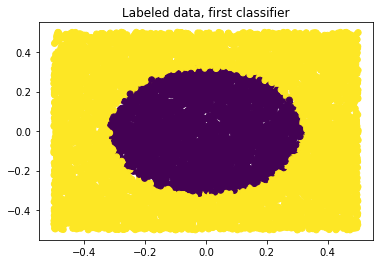

In [10]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

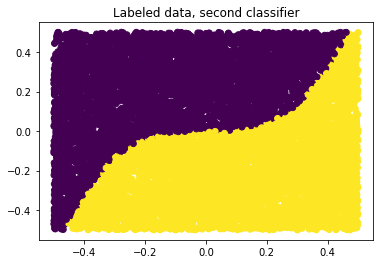

In [11]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

#### (a) Use M = 2 hidden nodes and ten epochs in SGD. Run this four or five times and comment on the performance of the two classifiers and whether it varies from run to run.

In [16]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 2 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 10 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

err_c1 = 0
err_c2 = 0
for j in range(5):   
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
        #print('epoch: ', epoch)
        
    print(f'Errors, first classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))   
    err_c1 += np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    
    print(f'Errors, second classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
    err_c2 += np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    
        
print("Average classifier 1 errors:", err_c1 / L)
print("Average classifier 2 errors:", err_c2 / L)

Errors, first classification problem for round 0: 3098.0
Errors, second classification problem for round 0: 4966.0

Errors, first classification problem for round 1: 6902.0
Errors, second classification problem for round 1: 5034.0

Errors, first classification problem for round 2: 3098.0
Errors, second classification problem for round 2: 5034.0

Errors, first classification problem for round 3: 6902.0
Errors, second classification problem for round 3: 5034.0

Errors, first classification problem for round 4: 3098.0
Errors, second classification problem for round 4: 5034.0

Average classifier 1 errors: 2309.8
Average classifier 2 errors: 2510.2


In [17]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(H@V)

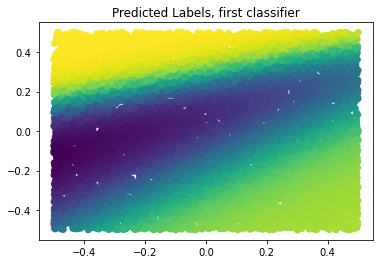

In [18]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

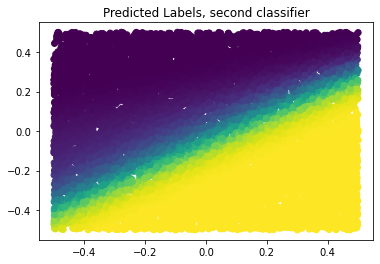

In [19]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

#### b) Repeat M = 2 but use 100 epochs in SGD. (You may use fewer epochs if it takes more than a minute or two per run.) Run this several times and comment on the performance of the classifiers and whether it varies from run to run.

In [21]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 2 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 30 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

err_c1 = 0
err_c2 = 0
for j in range(5):   
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
        #print('epoch: ', epoch)
        
    print(f'Errors, first classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))   
    err_c1 += np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    
    print(f'Errors, second classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
    err_c2 += np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    
        
print("Average classifier 1 errors:", err_c1 / L)
print("Average classifier 2 errors:", err_c2 / L)

Errors, first classification problem for round 0: 6902.0
Errors, second classification problem for round 0: 5034.0

Errors, first classification problem for round 1: 3098.0
Errors, second classification problem for round 1: 4966.0

Errors, first classification problem for round 2: 3098.0
Errors, second classification problem for round 2: 4966.0

Errors, first classification problem for round 3: 6902.0
Errors, second classification problem for round 3: 5034.0

Errors, first classification problem for round 4: 3098.0
Errors, second classification problem for round 4: 5034.0

Average classifier 1 errors: 769.9333333333333
Average classifier 2 errors: 834.4666666666667


In [22]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(H@V)

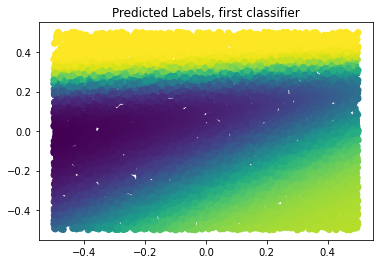

In [23]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

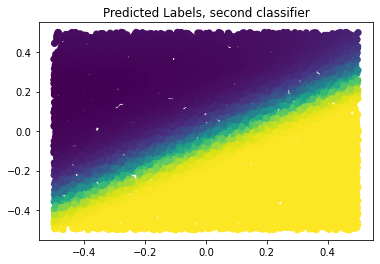

In [24]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

#### c) Recall the two-layer network results from the previous problem. How do the possible decision boundaries change when you add a hidden layer?

: The two-layer network gives more polarized decision boundaries. Added hiddn layer gives variety to the decision boundaries.

#### d) Now use M = 3 hidden nodes and run 100 epochs of SGD (or as many as you can compute). Does going from two to three hidden nodes affect classifier performance?

: Yes, transition from two to three hidden nodes gives better classifier performance.

In [25]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 30 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

err_c1 = 0
err_c2 = 0
for j in range(5):   
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
        #print('epoch: ', epoch)
        
    print(f'Errors, first classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))   
    err_c1 += np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    
    print(f'Errors, second classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
    err_c2 += np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    
        
print("Average classifier 1 errors:", err_c1 / L)
print("Average classifier 2 errors:", err_c2 / L)

Errors, first classification problem for round 0: 6902.0
Errors, second classification problem for round 0: 5034.0

Errors, first classification problem for round 1: 3098.0
Errors, second classification problem for round 1: 4966.0

Errors, first classification problem for round 2: 3098.0
Errors, second classification problem for round 2: 4966.0

Errors, first classification problem for round 3: 3098.0
Errors, second classification problem for round 3: 4966.0

Errors, first classification problem for round 4: 3098.0
Errors, second classification problem for round 4: 4966.0

Average classifier 1 errors: 643.1333333333333
Average classifier 2 errors: 829.9333333333333


#### e) Repeat the previous part for M = 4 hidden nodes and comment on classifier performance.

: Having 4 hidden nodes does not give conspicuous advantange compared to 3 hidden nodes.

In [26]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 4 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 30 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

err_c1 = 0
err_c2 = 0
for j in range(5):   
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
        #print('epoch: ', epoch)
        
    print(f'Errors, first classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))   
    err_c1 += np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    
    print(f'Errors, second classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
    err_c2 += np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    
        
print("Average classifier 1 errors:", err_c1 / L)
print("Average classifier 2 errors:", err_c2 / L)

Errors, first classification problem for round 0: 3098.0
Errors, second classification problem for round 0: 5034.0

Errors, first classification problem for round 1: 3098.0
Errors, second classification problem for round 1: 4966.0

Errors, first classification problem for round 2: 3098.0
Errors, second classification problem for round 2: 4966.0

Errors, first classification problem for round 3: 6902.0
Errors, second classification problem for round 3: 4966.0

Errors, first classification problem for round 4: 3098.0
Errors, second classification problem for round 4: 5034.0

Average classifier 1 errors: 643.1333333333333
Average classifier 2 errors: 832.2
